In [ ]:
#Use more data? : https://github.com/robertmartin8/PyPortfolioOpt/issues/263

In [2]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from qiskit_finance.data_providers import RandomDataProvider
from qiskit_finance.data_providers import YahooDataProvider

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Set parameters for assets and risk factor
num_assets = 25     
q = 0.5                   # set risk factor to 0.5
budget = 20           # set budget as defined in the problem
seed = 479     #set random seed

# Generate time series data
stocks = [("STOCK%s" % i) for i in range(num_assets)]
data = RandomDataProvider(tickers=stocks,
                 start=datetime.datetime(2022, 1, 1),
                 end=datetime.datetime(2024, 1, 1),
                 seed=seed)
data.run()

In [9]:
len(data._data[0])

730

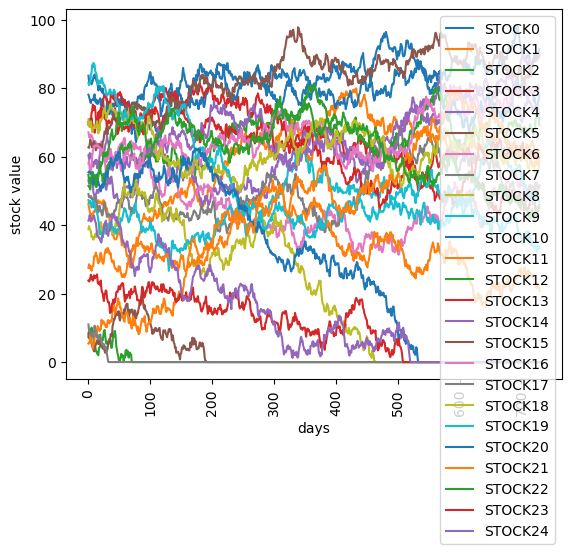

In [11]:
# Let's plot our finanical data
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('days')
plt.ylabel('stock value')
plt.show()

In [27]:
# Read in price data
df = pd.DataFrame(np.array(data._data).T)

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe(risk_free_rate=0.02)
ef.portfolio_performance(verbose=True)

allocations = {asset: amt*budget for asset, amt in weights.items()}
print(allocations)

Expected annual return: 17.3%
Annual volatility: 10.1%
Sharpe Ratio: 1.52
{0: 0.0, 1: 2.2911072572231, 2: 0.08157257567406999, 3: 0.0, 4: 1.0309221898204481, 5: 0.0, 6: 0.0, 7: 0.265661592011644, 8: 0.0, 9: 0.0, 10: 0.35431972299620396, 11: 1.17987914319143, 12: 1.024149551501026, 13: 0.0, 14: 3.344756576394332, 15: 4.20051248504333, 16: 2.830549453770856, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 3.396569452373568, 22: 0.0, 23: 0.0, 24: 0.0}


/opt/anaconda3/lib/python3.12/site-packages/pypfopt/expected_returns.py:32: UserWarning: Some returns are NaN. Please check your price data.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
